
### ------ X20 ---------

Resampling and reorientation of reconstruction volume. Also contains some experiments.

Inspired by the previous works of Hans Martin Kjer.

In [8]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def display_slices(volume, axis=0, slices=None, rows=1, cols=None, slice_range=(None, None), fig_scale=1.0, include_endpoints=False, magnify=1.0, show=True):
    num_slices = volume.shape[axis]

    # Extract start and end from slice_range
    slice_start, slice_end = slice_range
    if slice_start is None:
        slice_start = 0
    if slice_end is None:
        slice_end = num_slices - 1

    if slices is None:
        slices = np.linspace(slice_start, slice_end, 5, dtype=int)
    if isinstance(slices, int):
        if include_endpoints:
            slices = np.linspace(slice_start, slice_end, slices, dtype=int)
        else:
            # Adjust the range to skip the very first and last points
            step = (slice_end - slice_start) / (slices + 1)
            new_start = slice_start + step
            new_end = slice_end - step
            slices = np.linspace(new_start, new_end, slices, dtype=int)

    total_slices = len(slices)

    if cols is None:
        # Calculate columns based on the number of rows and total slices
        cols = (total_slices + rows - 1) // rows  # Ceiling division

    # Adjust figure size based on the fig_scale parameter
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3 * fig_scale, rows * 3 * fig_scale), squeeze=False)

    for i, slice_num in enumerate(slices):
        if magnify > 1.0:
            other_axes = [x for x in range(3) if x != axis]
            center = np.array(np.array(volume.shape)[other_axes]) // 2
            length = np.array(np.array(volume.shape)[other_axes]) // magnify
            min_idx = np.round(center - length // 2).astype(int)
            max_idx = np.round(center + length // 2).astype(int)

            if axis == 0:
                slice_data = volume[slice_num, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
            elif axis == 1:
                slice_data = volume[min_idx[0]:max_idx[0], slice_num, min_idx[1]:max_idx[1]]
            else:
                slice_data = volume[min_idx[0]:max_idx[0], min_idx[1]:max_idx[1], slice_num]
        else:
            if axis == 0:
                slice_data = volume[slice_num, :, :]
            elif axis == 1:
                slice_data = volume[:, slice_num, :]
            else:
                slice_data = volume[:, :, slice_num]

        ax = axs[i // cols, i % cols]
        ax.imshow(slice_data, cmap='gray')
        ax.axis('off')
        # Set subtitle in the upper left corner with a background
        ax.text(0.05, 0.95, f'Slice {slice_num}', color='white', ha='left', va='top', fontsize=12 * fig_scale * 0.5, 
                transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Hide any extra axes if there are more subplots than slices
    for j in range(i + 1, rows * cols):
        axs[j // cols, j % cols].axis('off')

    pad_size = 0.5
    plt.tight_layout(pad=0, h_pad= pad_size*fig_scale, w_pad=pad_size*fig_scale)
    if show: plt.show()

def display_slices2(volume, slice_info, rows=1, cols=None, fig_scale=1.0, magnify=1.0, show=True):
    if cols is None:
        # Calculate columns based on the number of rows and total slices
        cols = (len(slice_info) + rows - 1) // rows  # Ceiling division

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3 * fig_scale, rows * 3 * fig_scale), squeeze=False)

    for i, (axis, slice_num) in enumerate(slice_info):
        if magnify > 1.0:
            other_axes = [x for x in range(3) if x != axis]
            center = np.array([volume.shape[ax] // 2 for ax in other_axes])
            length = np.array([volume.shape[ax] // magnify for ax in other_axes])
            min_idx = np.round(center - length // 2).astype(int)
            max_idx = np.round(center + length // 2).astype(int)

            if axis == 0:
                slice_data = volume[slice_num, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
            elif axis == 1:
                slice_data = volume[min_idx[0]:max_idx[0], slice_num, min_idx[1]:max_idx[1]]
            else:
                slice_data = volume[min_idx[0]:max_idx[0], min_idx[1]:max_idx[1], slice_num]
        else:
            if axis == 0:
                slice_data = volume[slice_num, :, :]
            elif axis == 1:
                slice_data = volume[:, slice_num, :]
            else:
                slice_data = volume[:, :, slice_num]

        ax = axs.flatten()[i]
        ax.imshow(slice_data, cmap='gray')
        ax.axis('off')
        # Set subtitle in the upper left corner with a background
        ax.text(0.05, 0.95, f'Axis {axis}, Slice {slice_num}', color='white', ha='left', va='top', 
                fontsize=12 * fig_scale * 0.5, transform=ax.transAxes, 
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Hide any extra axes if there are more subplots than slices
    for j in range(i + 1, rows * cols):
        axs.flatten()[j].axis('off')

    pad_size = 0.5
    plt.tight_layout(pad=0, h_pad=pad_size * fig_scale, w_pad=pad_size * fig_scale)
    if show: plt.show()

In [10]:
# Function to plot FOV box
def plotFOVbox(ax, box, formatStr):
    
    xf,yf,zf = np.meshgrid(box[:,0],box[:,1],box[:,2], indexing='ij')
    ptsBox = np.transpose(np.array([xf.ravel(),yf.ravel(),zf.ravel()]))

    ax.plot( ptsBox[[0,1,3,2,0],0], ptsBox[[0,1,3,2,0],1], ptsBox[[0,1,3,2,0],2], formatStr)
    ax.plot( ptsBox[[2,3,7,6,2],0], ptsBox[[2,3,7,6,2],1], ptsBox[[2,3,7,6,2],2], formatStr)
    ax.plot( ptsBox[[0,1,5,4,0],0], ptsBox[[0,1,5,4,0],1], ptsBox[[0,1,5,4,0],2], formatStr)
    ax.plot( ptsBox[[4,5,7,6,4],0], ptsBox[[4,5,7,6,4],1], ptsBox[[4,5,7,6,4],2], formatStr)

In [11]:
import pickle
import os

In [12]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')

file_path = os.path.join(base_dir,'bjobs/X20_bhc_recon_full.pkl')
with open(file_path, 'rb') as file:
    recon_bhc = pickle.load(file)

In [13]:
file_path = os.path.join(base_dir,'bjobs/X20_recon_full.pkl')
with open(file_path, 'rb') as file:
    recon = pickle.load(file)

In [14]:
from cil.framework.framework import ImageData, ImageGeometry
new_ig = recon_bhc.geometry
new_ig.voxel_num_z = 800
recon_bhc = ImageData(array=recon_bhc.as_array()[100:-100], geometry=new_ig)

In [15]:
print(recon_bhc)

Number of dimensions: 3
Shape: (800, 1000, 1000)
Axis labels: ('vertical', 'horizontal_y', 'horizontal_x')



In [16]:
print(recon.geometry.__dir__())
print(recon.geometry)

['voxel_num_x', 'voxel_num_y', 'voxel_num_z', 'voxel_size_x', 'voxel_size_y', 'voxel_size_z', 'center_x', 'center_y', 'center_z', 'channels', 'channel_labels', 'channel_spacing', '_dtype', '__module__', 'RANDOM', 'RANDOM_INT', 'CHANNEL', 'VERTICAL', 'HORIZONTAL_X', 'HORIZONTAL_Y', 'shape', 'spacing', 'length', 'ndim', 'dimension_labels', 'set_labels', '__eq__', 'dtype', '__init__', 'get_slice', 'get_order_by_label', 'get_min_x', 'get_max_x', 'get_min_y', 'get_max_y', 'get_min_z', 'get_max_z', 'clone', 'copy', '__str__', 'allocate', '__dict__', '__weakref__', '__doc__', '__hash__', '__new__', '__repr__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
Number of channels: 1
channel_spacing: 1.0
voxel_num : x1000,y1000,z800
voxel_size : x0.09202619345700429,y0.09202619345700429,z0.09202619345700429
center : x0,y0,z0

In [17]:
imgDim = recon.shape
imgSpacing = recon.geometry.spacing
print('Image dimensions and voxel size')
print(imgDim)
print(imgSpacing)


affine = np.diag([*imgSpacing,1])
print('\nThe affine matrix of the original volume')
print(affine)

Image dimensions and voxel size
(800, 1000, 1000)
(0.09202619345700429, 0.09202619345700429, 0.09202619345700429)

The affine matrix of the original volume
[[0.09202619 0.         0.         0.        ]
 [0.         0.09202619 0.         0.        ]
 [0.         0.         0.09202619 0.        ]
 [0.         0.         0.         1.        ]]


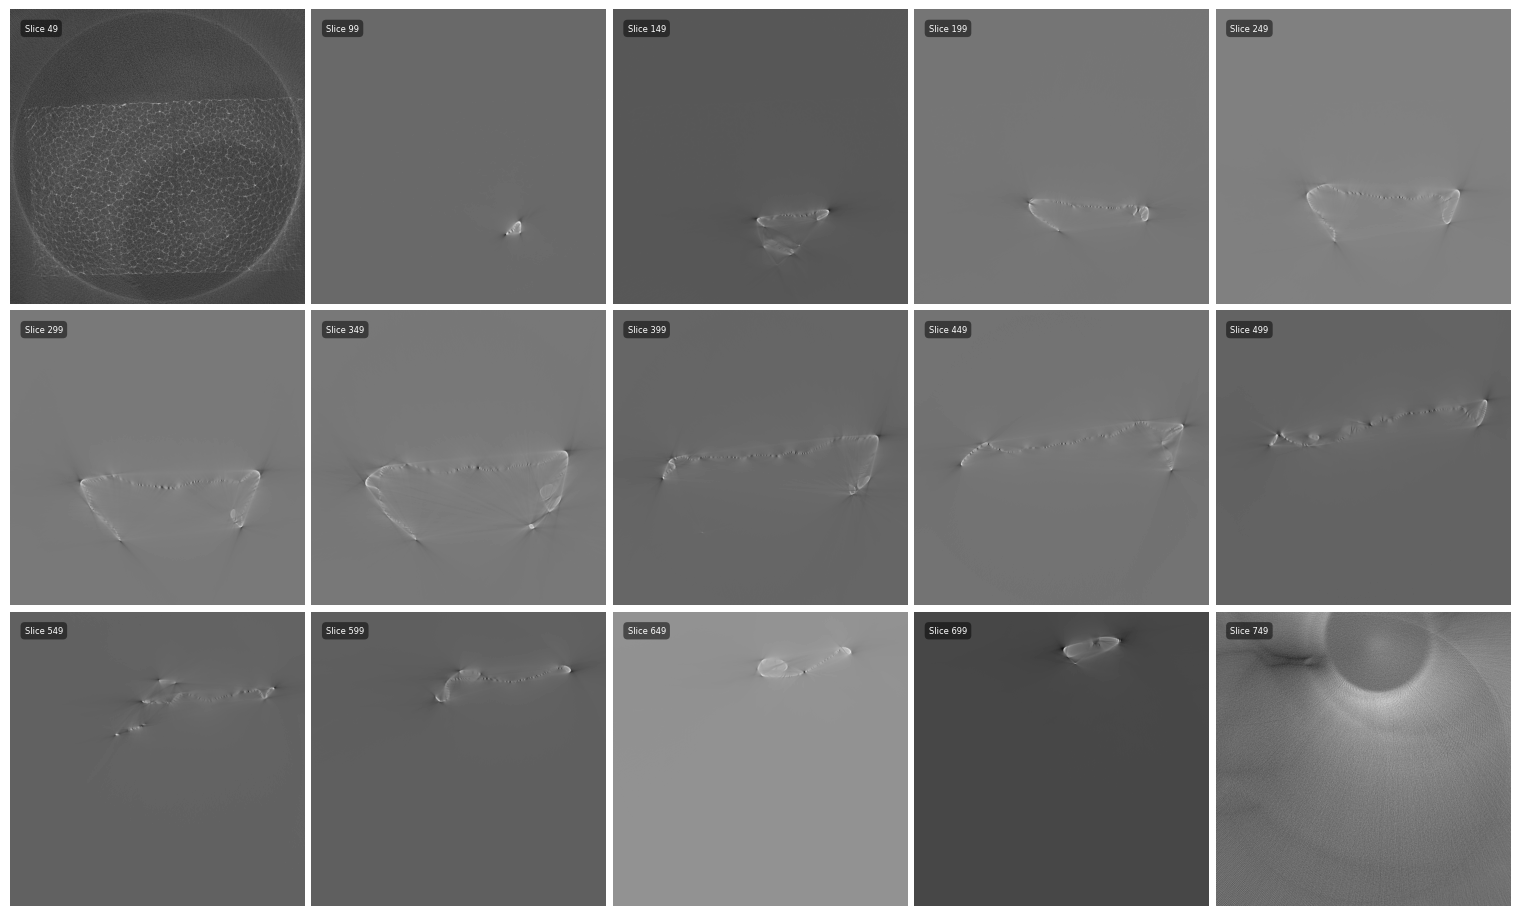

In [18]:
display_slices(recon.as_array(), slices=15, rows=3)
# display_slices2(recon.as_array(), slice_info=[[0,249]], fig_scale=2)

### Experiment with median filtering

In [19]:
from scipy import ndimage
abs_slice = np.abs(recon_bhc.as_array()[399])
result = ndimage.median_filter(abs_slice, size=6)

Text(0.5, 1.0, 'Y-slice')

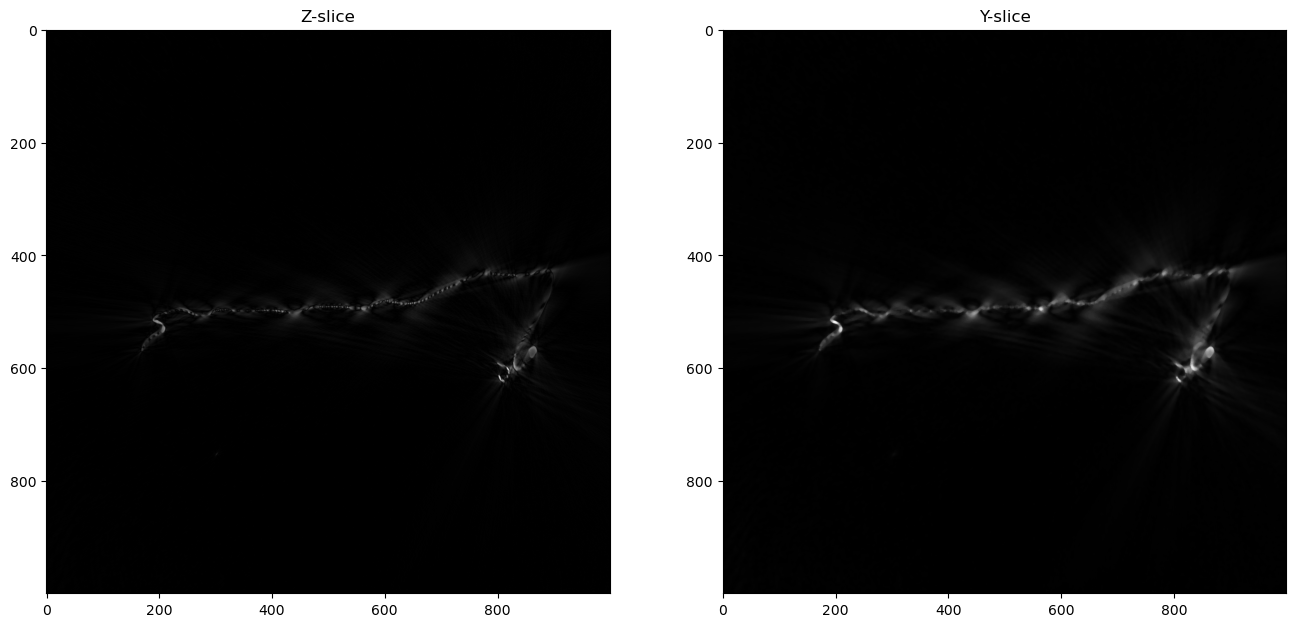

In [20]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
ax[0].imshow(abs_slice, cmap='gray')
ax[0].set_title('Z-slice')
ax[1].imshow(result, cmap='gray')
ax[1].set_title('Y-slice')

In [21]:
recon_bhc

### Thresholding


FOV bounds in world coordinates
[[ 0.          0.          0.        ]
 [73.52892857 91.93416726 91.93416726]]


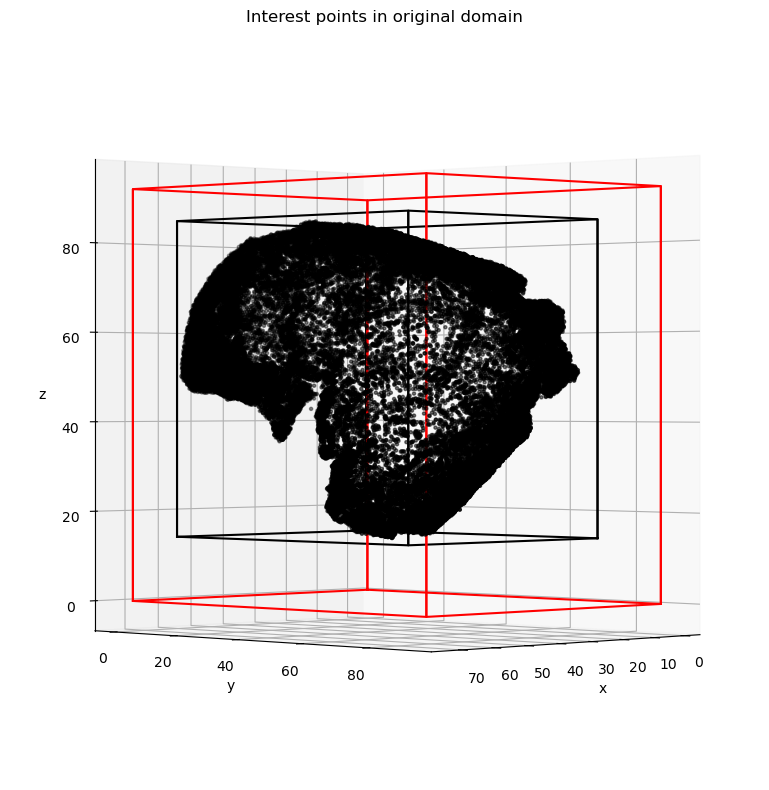

In [22]:
# Intensity threshold
thresholdInt = 0.1
#

# Bounds of FOV
fov_pts = np.array([[0,0,0], [imgDim[0]-1, imgDim[1]-1, imgDim[2]-1]])
fov_pts = fov_pts @ affine[0:3, 0:3] # Apply the affine transformation (rotation and scaling)
fov_pts = fov_pts + affine[0:3, 3] # Apply the affine transformation (translation)
print('FOV bounds in world coordinates')
print(fov_pts)

# Get the foreground as point coordinates
pi, pj, ps = np.where(recon.as_array() > thresholdInt)

# Stack into a array of n X 3 and convert to world coordinates
points = np.vstack((pi, pj, ps)).T
points = points @ affine[0:3, 0:3] # Apply the affine transformation (rotation and scaling)
points = points + affine[0:3, 3] # Apply the affine transformation (translation)

# Bounding box of points
x_min, y_min, z_min = np.min(points, axis=0)
x_max, y_max, z_max = np.max(points, axis=0)
box = np.array([[x_min, y_min, z_min], [x_max, y_max, z_max]])

# Plot a subset of the points

## --- Choose a subset of points and view point of display --- ##

subset = 100
viewPoint = [45, 0]

## ----------------------------------------------------------- ##

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(points[::subset,0], points[::subset,1], points[::subset,2], c='k', marker='.')
plotFOVbox(ax, box, 'k')
plotFOVbox(ax, fov_pts, 'r')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.azim = viewPoint[0]
ax.elev = viewPoint[1]
ax.set_title('Interest points in original domain')
plt.tight_layout()
plt.show()

### PCA for resampling direction

In [23]:
## Principal Component Analysis (PCA) of the point cloud
points_mu = np.mean(points, axis = 0) # Center the point cloud
cov = np.cov(np.transpose(points)) # Covariance matrix 

## --- SVD or Eigendecomposition --- ##

U,S,V = np.linalg.svd(cov,full_matrices=False) # SVD

# Apply transform to rotated pointcloud
# - translate (remove mean), and then rotate
points_rot = (points - points_mu) @ U

## ---------------------------------- ##

#eigVal, eigVec = np.linalg.eig(cov)

print('U:')
print(U)
print('')
print('S:')
print(S)
print('')
print('V:')
print(V)
print('')
print('')
#print('Eigenvectors')
#print(eigVec)
#print('')
#print('Eigenvalues')
#print(eigVal)

U:
[[-0.61869079 -0.16263162  0.76861737]
 [ 0.76137189  0.11714172  0.63764462]
 [-0.19373834  0.97970851  0.05134864]]

S:
[594.37482286 353.98942812  11.29031994]

V:
[[-0.61869079  0.76137189 -0.19373834]
 [-0.16263162  0.11714172  0.97970851]
 [ 0.76861737  0.63764462  0.05134864]]




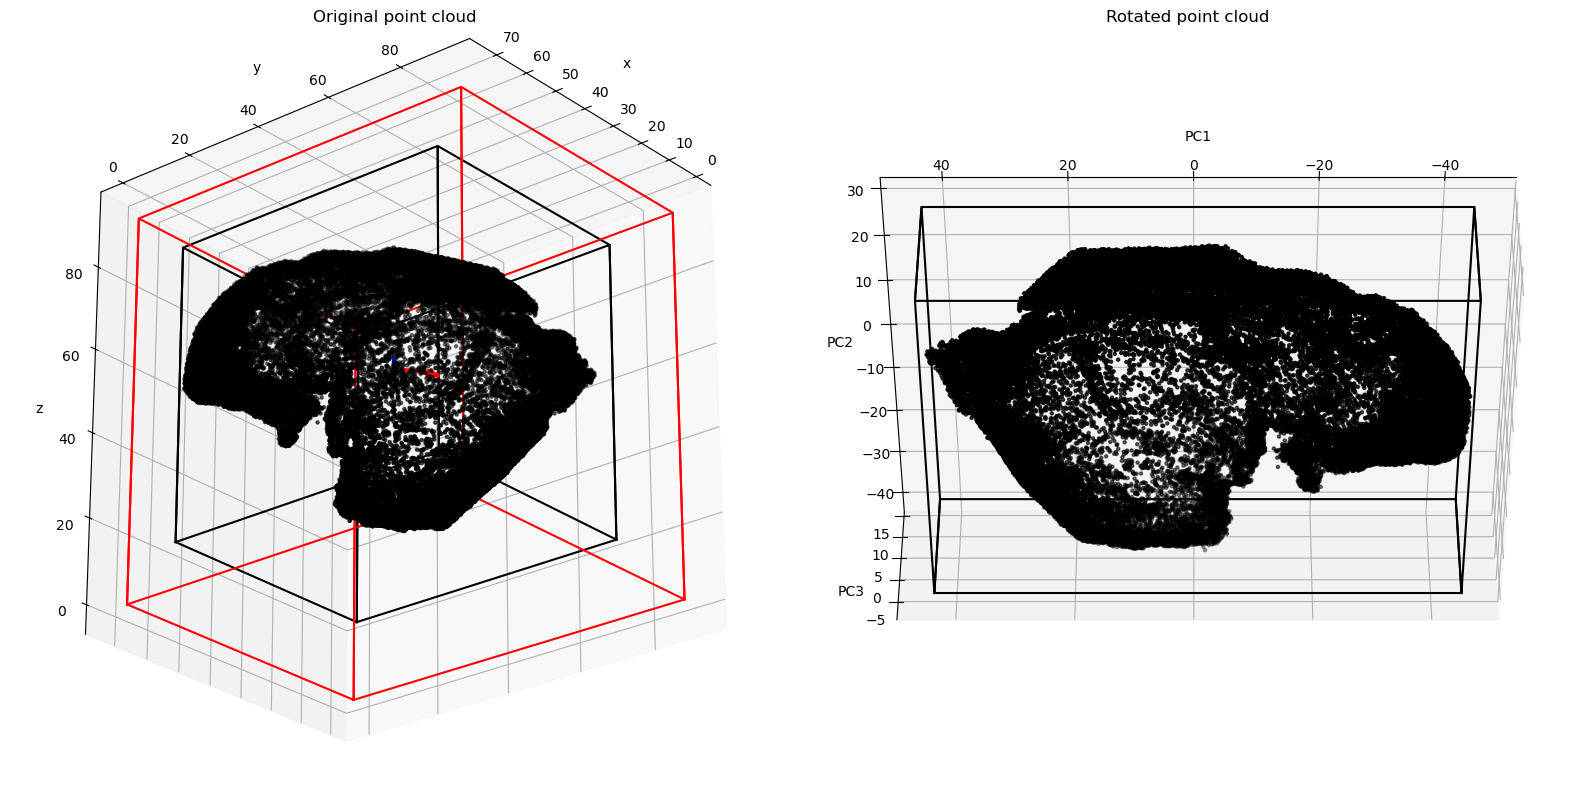

In [24]:
# Display the result
# -- Add principal axes to original point cloud plot
# -- Plot rotated point cloud

# Bounding box
x_min, y_min, z_min = np.min(points_rot, axis=0)
x_max, y_max, z_max = np.max(points_rot, axis=0)
box_rot = np.array([[x_min, y_min, z_min], [x_max, y_max, z_max]])

# Plot the rotated pointcloud
fig = plt.figure(figsize=(16, 8))

# display the original point cloud with the principal axes
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(points[::subset,0], points[::subset,1], points[::subset,2], c='k', marker='.')
plotFOVbox(ax, box, 'k')
plotFOVbox(ax, fov_pts, 'r')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.azim = 40
ax.elev = -25
ax.set_title('Original point cloud')

## --- Add the principal axes to the plot using quiver() --- ##

ax.quiver(points_mu[0], points_mu[1], points_mu[2], U[0,0], U[1,0], U[2,0], color='r', length=10.0, normalize=True, linewidth=2.5)
ax.quiver(points_mu[0], points_mu[1], points_mu[2], U[0,1], U[1,1], U[2,1], color='g', length=7.5, normalize=True, linewidth=2.5)
ax.quiver(points_mu[0], points_mu[1], points_mu[2], U[0,2], U[1,2], U[2,2], color='b', length=5.0, normalize=True, linewidth=2.5)

# ---------------------------------------------------------- ##

# Display the rotated point cloud 
ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(points_rot[::subset,0], points_rot[::subset,1], points_rot[::subset,2], c='k', marker='.')
plotFOVbox(ax, box_rot, 'k')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_aspect('equal')
ax.azim = 90
ax.elev = -45
ax.set_title('Rotated point cloud')
plt.tight_layout()

In [25]:
# Set up grid interpolator for the moving image
from scipy.interpolate import RegularGridInterpolator

# --- Choose inter-/extra-polation --- #

intMethod = 'linear' #Options: "linear", "nearest", "slinear", "cubic", "quintic" and "pchip" 
expVal = 0.0 #Value for extrapolation (i.e. values outside volume domain)

# ------------------------------------ #

# Set-up interpolators for moving image
x = np.arange(start=0, stop=imgDim[0], step=1) * imgSpacing[0] + affine[0,3]
y = np.arange(start=0, stop=imgDim[1], step=1) * imgSpacing[1] + affine[1,3]
z = np.arange(start=0, stop=imgDim[2], step=1) * imgSpacing[2] + affine[2,3]
F_moving = RegularGridInterpolator((x, y, z), recon.as_array().astype('float16'), method=intMethod, bounds_error=False, fill_value=expVal)

In [26]:
print(box_rot)
box_rot[1] - box_rot[0]

[[-44.8344641  -40.08160126  -7.54535784]
 [ 43.45330907  27.4412676   14.19349445]]


array([88.28777318, 67.52286886, 21.73885229])

[4.41438866 3.37614344 1.08694261]
[[-49.24885276 -43.4577447   -8.63230045]
 [ 47.86769773  30.81741104  15.28043707]]
New volume dimensions
(1057, 809, 261)


Text(0.5, 0.92, 'New sample points')

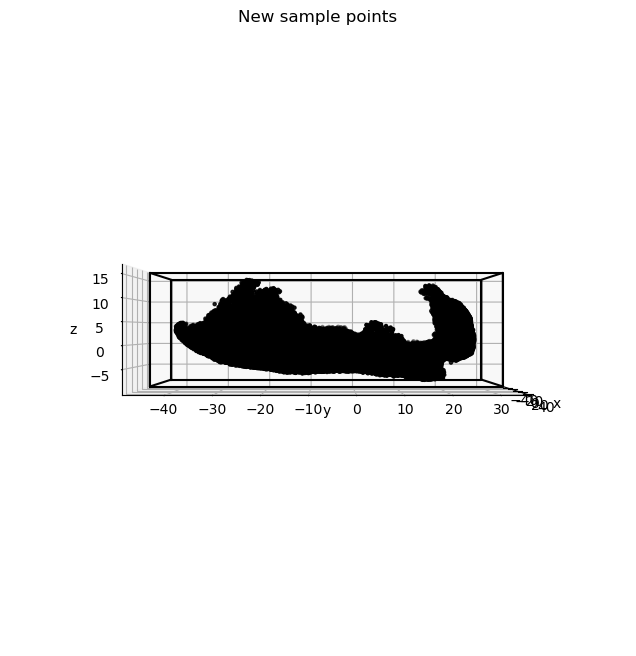

In [27]:
# Set-up new resampling domain

# Extend the bounding box and convert to physical space
boxScale = np.array([0.1, 0.1, 0.1]) # scaling in each direction
pad = (box_rot[1] - box_rot[0]) * boxScale / 2
boxPad = np.array([box_rot[0] - pad, box_rot[1] + pad]) 
print(pad)
print(boxPad)

## --- Choose the new grid --- ##
xMin = boxPad[0,0]
xMax = boxPad[1,0]

yMin = boxPad[0,1]
yMax = boxPad[1,1]

zMin = boxPad[0,2]
zMax = boxPad[1,2]

spacing = imgSpacing[1] # The new voxel size (here assuming isotropic)

## --------------------------- ##

# Define the query grid (physical space)
vX = np.arange(xMin, xMax+spacing, spacing) 
vY = np.arange(yMin, yMax+spacing, spacing) 
vZ = np.arange(zMin, zMax+spacing, spacing) 
qX,qY,qZ = np.meshgrid(vX,vY,vZ, indexing='ij')
ptsQ = np.transpose(np.array([qX.ravel(),qY.ravel(),qZ.ravel()])) # Now stored as [N x 3] pointset

print('New volume dimensions')
print(qX.shape)

# Plot the query grid
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
plotFOVbox(ax, boxPad, 'k')
# ax.scatter(ptsQ[::subset*450,0], ptsQ[::subset*450,1], ptsQ[::subset*450,2], c='b', marker='.')
ax.scatter(points_rot[::subset,0], points_rot[::subset,1], points_rot[::subset,2], c='k', marker='.')#,alpha=0.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.azim = 0
ax.elev = 0
ax.set_title('New sample points')
# plt.tight_layout()
# plt.savefig("plot.png", bbox_inches='tight', pad_inches=-2)

(223184493,)


Text(0.5, 0.92, 'FOV and transformed sample points')

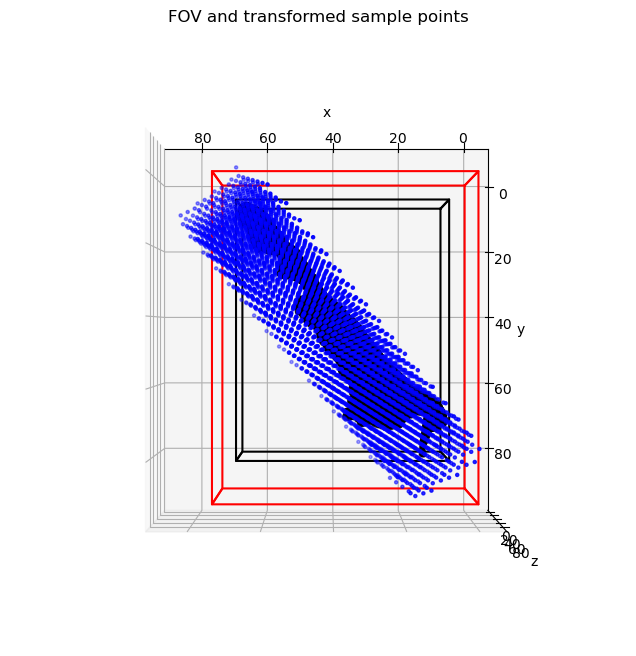

In [62]:
# Tranform and interpolate the new volume intensities

## --- Transform the query grid to the original space --- ##
# - Inverse rotation and then translate (add mean)
ptsQ_t = (ptsQ @ U.T) + points_mu

## ------------------------------------------------------ ##

# Evaluate transformed grid points in the moving image
fVal = F_moving(ptsQ_t)
print(fVal.shape)

# Reshape to voxel grid
volQ = np.reshape(fVal,newshape=qX.shape).astype('float16')

# Showcase the transformed query
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(ptsQ_t[::subset*550,0], ptsQ_t[::subset*550,1], ptsQ_t[::subset*550,2], c='b', marker='.')
plotFOVbox(ax, box, 'k')
plotFOVbox(ax, fov_pts, 'r')
ax.scatter(points[::subset,0], points[::subset,1], points[::subset,2], c='k', marker='.')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.azim = 90
ax.elev = 90
ax.set_title('FOV and transformed sample points')

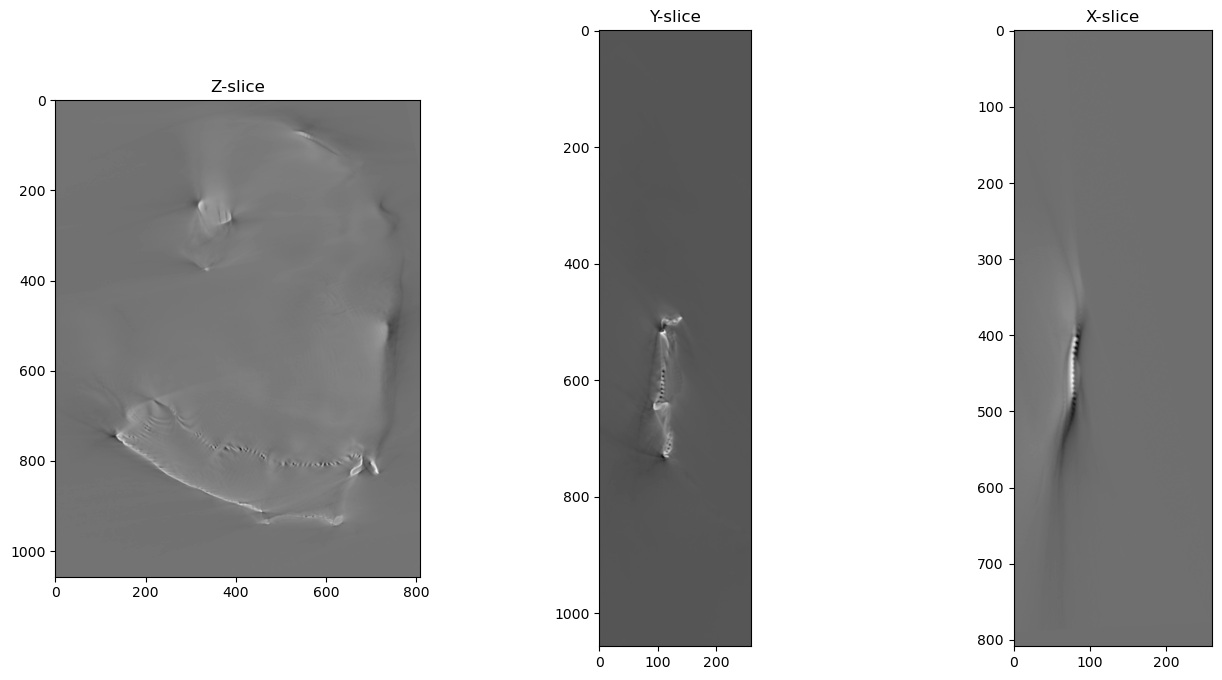

In [29]:
# Show slices from volQ

## --- Choose slices to display --- ##
sliceZ = 60
sliceY = 70
sliceX = 50

## -------------------------------- ##

fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(volQ[:,:,sliceZ], cmap='gray')
ax[0].set_title('Z-slice')
ax[1].imshow(volQ[:,sliceY,:], cmap='gray')
ax[1].set_title('Y-slice')
ax[2].imshow(volQ[sliceX,:,:], cmap='gray')
ax[2].set_title('X-slice')
plt.show()

Text(0.5, 1.0, 'Mean projection (z)')

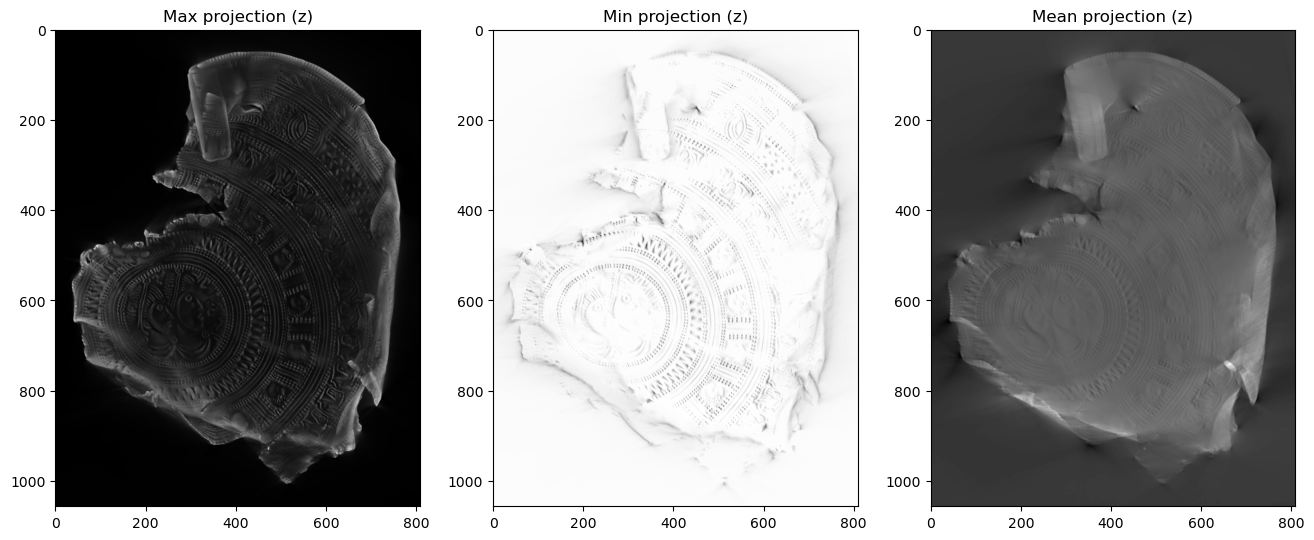

In [30]:
# Projections

fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(np.max(volQ,axis=2), cmap='gray')
ax[0].set_title('Max projection (z)')
ax[1].imshow(np.min(volQ,axis=2), cmap='gray')
ax[1].set_title('Min projection (z)')
ax[2].imshow(np.mean(volQ,axis=2), cmap='gray')
ax[2].set_title('Mean projection (z)')

In [31]:
import nibabel as nib

## --- Where to store --- ##
outFolder = ''
outFile = 'x20_fbp_pca.nii'
## ---------------------- ##

# Prep minimal nifti (.nii) header
origin = np.array([xMin,yMin,zMin])
affineNew = np.zeros((4,4))
affineNew[0:3,3] = origin
affineNew[0,0] = spacing
affineNew[1,1] = spacing
affineNew[2,2] = spacing

# Store
niiPCA = nib.Nifti1Image(volQ.astype(np.float32),affineNew)
nib.save(niiPCA,outFolder + outFile)

print('Volume exported')

Volume exported


In [32]:
# Export PCA and resampling info for future use
np.savez('PCA_resampling',spacing=imgSpacing, dimensions=imgDim, affine=affine, PCA_U=U, PCA_S=S, PCA_V=V, resampBox=boxPad, resampSpacing=spacing)


### Apply PCA transform to aligned bhc_recon volume

In [33]:
recon_bhc.as_array()

array([[[ 1.03500570e-04,  6.33366362e-05, -8.20881833e-05, ...,
          1.55170244e-04,  2.50948564e-04, -1.59310162e-04],
        [ 1.24640821e-04,  2.12192768e-04,  2.82111287e-05, ...,
          3.83166655e-04,  4.91303836e-05, -2.56300438e-04],
        [ 2.69522105e-04,  1.10651708e-04,  3.63095634e-04, ...,
          3.26809968e-04, -7.74042710e-05, -2.95857113e-04],
        ...,
        [-4.71133399e-06, -2.22860726e-05,  4.73414912e-06, ...,
          1.66941502e-10, -5.75895887e-10,  6.02455100e-11],
        [ 3.38797872e-05,  5.59465079e-05,  6.94779737e-05, ...,
          1.37786960e-09, -4.35557111e-11, -5.50618884e-10],
        [ 4.59803305e-05,  1.19477063e-05, -2.57752599e-05, ...,
          7.55873086e-10,  1.46903045e-09,  4.82811124e-10]],

       [[ 1.04489271e-03,  2.43162634e-04, -8.83392058e-04, ...,
          7.28461091e-05,  4.97801193e-05, -1.25344610e-04],
        [ 4.79024398e-04,  8.31603596e-04, -7.64309152e-05, ...,
          1.53085639e-04, -6.10195420e

Text(0.5, 1.0, 'Slice from BHC volume')

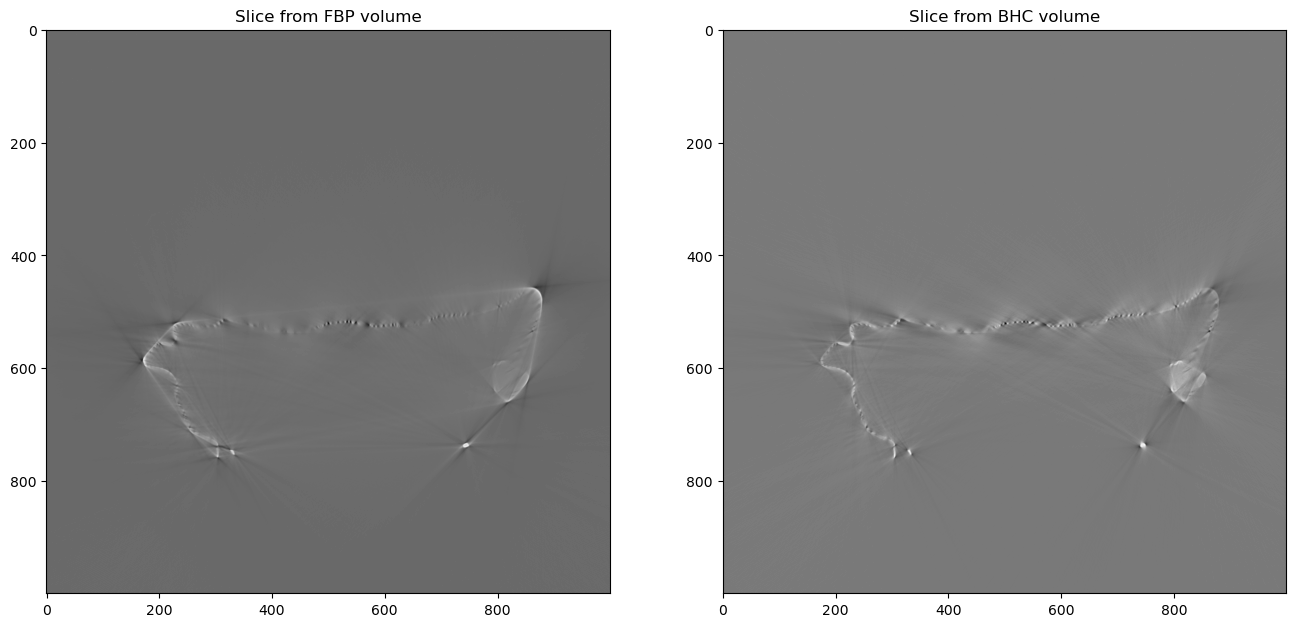

In [34]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
ax[0].imshow(recon.as_array()[364,:,:], cmap='gray')
ax[0].set_title('Slice from FBP volume')
ax[1].imshow(recon_bhc.as_array()[364,:,:], cmap='gray')
ax[1].set_title('Slice from BHC volume')

In [35]:
F_BHC = RegularGridInterpolator((x, y, z), recon_bhc.as_array(), method=intMethod, bounds_error=False, fill_value=expVal)

In [63]:
# Evaluate transformed grid points in the BHC image
fVal = F_BHC(ptsQ_t)

# Reshape to voxel grid
volBHC = np.reshape(fVal,newshape=qX.shape).astype('float16')


In [ ]:
import h5py

with h5py.File("vols/X20_FDK_rot.h5", "w") as f:
    f.create_dataset("vol", data=volQ)

with h5py.File("vols/X20_BHC_rot.h5", "w") as f:
    f.create_dataset("vol", data=volBHC)

In [37]:
# Get projections at similar scaling [0,1]

volF = volQ
maxF = np.max(volF.flatten())
minF = np.min(volF.flatten())

volB = volBHC
maxB = np.max(volB.flatten())
minB = np.min(volB.flatten())

newMax = 1
newMin = 0

volF = (volF-minF) * (newMax-newMin)/(maxF-minF) + newMin
volB = (volB-minB) * (newMax-newMin)/(maxB-minB) + newMin

Text(0.5, 0.98, 'BHC projections')

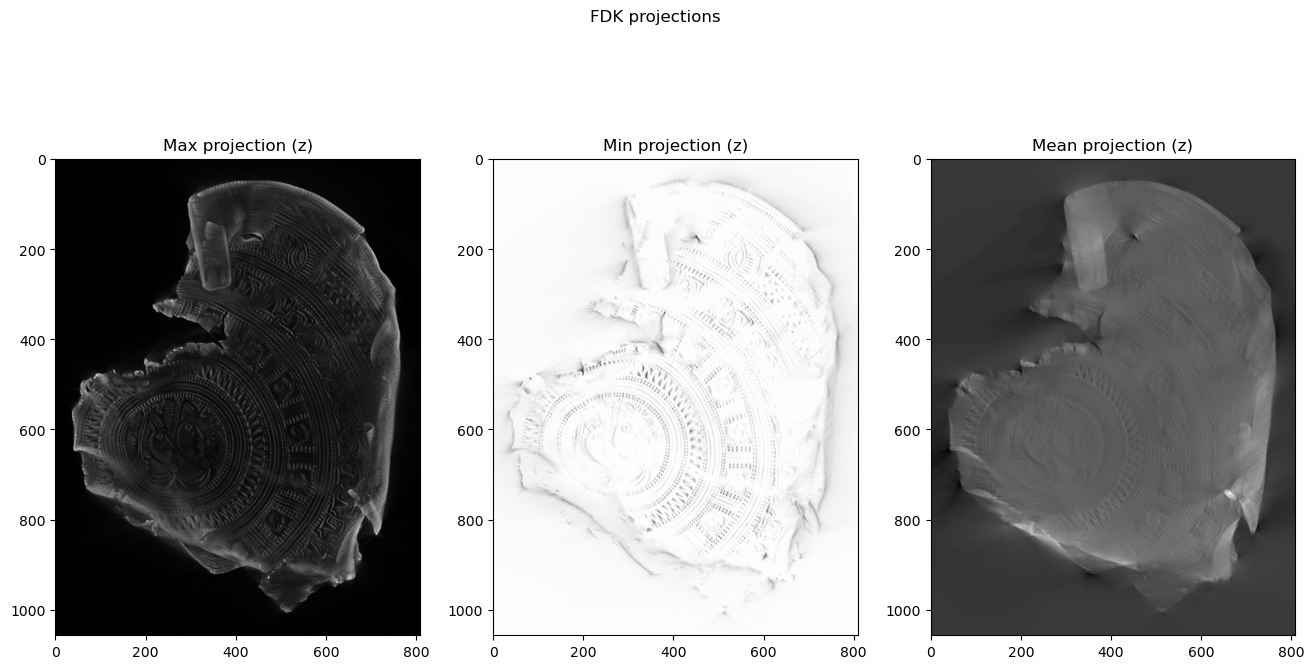

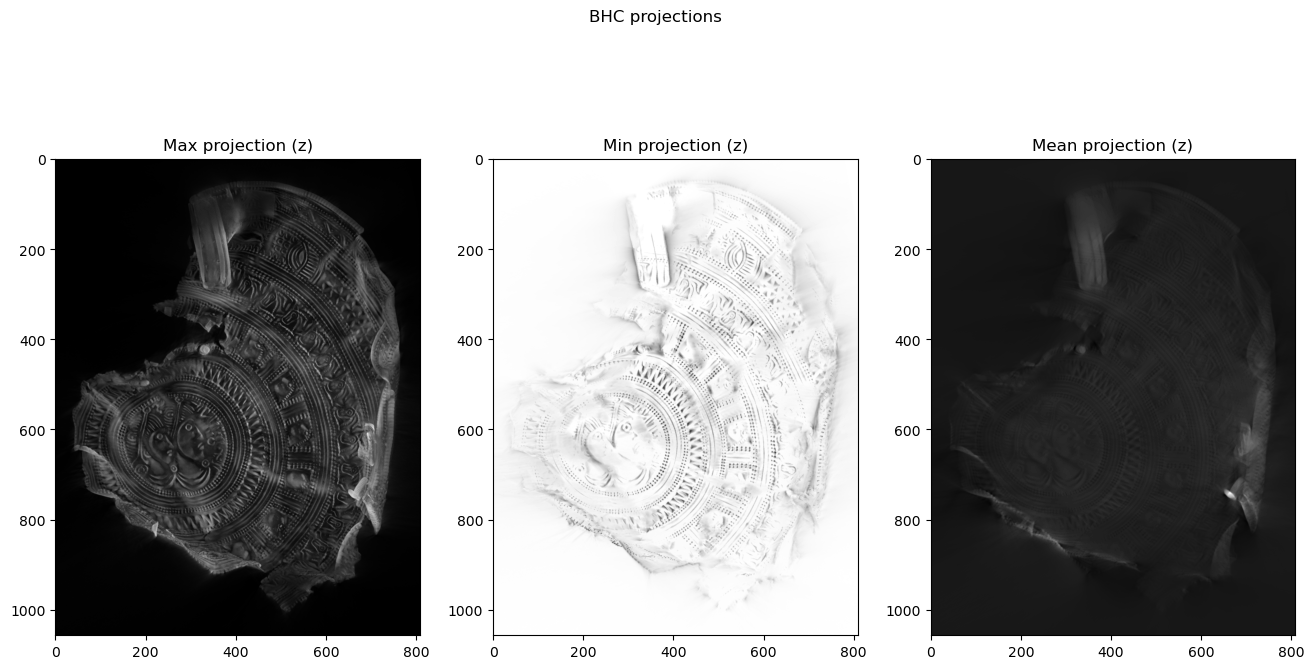

In [38]:
# Projections
fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(np.max(volF,axis=2), cmap='gray')
ax[0].set_title('Max projection (z)')
ax[1].imshow(np.min(volF,axis=2), cmap='gray')
ax[1].set_title('Min projection (z)')
ax[2].imshow(np.mean(volF,axis=2), cmap='gray')
ax[2].set_title('Mean projection (z)')
plt.suptitle('FDK projections')

# Projections
fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(np.max(volB,axis=2), cmap='gray')
ax[0].set_title('Max projection (z)')
ax[1].imshow(np.min(volB,axis=2), cmap='gray')
ax[1].set_title('Min projection (z)')
ax[2].imshow(np.mean(volB,axis=2), cmap='gray')
ax[2].set_title('Mean projection (z)')
plt.suptitle('BHC projections')

In [39]:
maxF = np.max(volF,axis=2)
maxB = np.max(volB,axis=2)

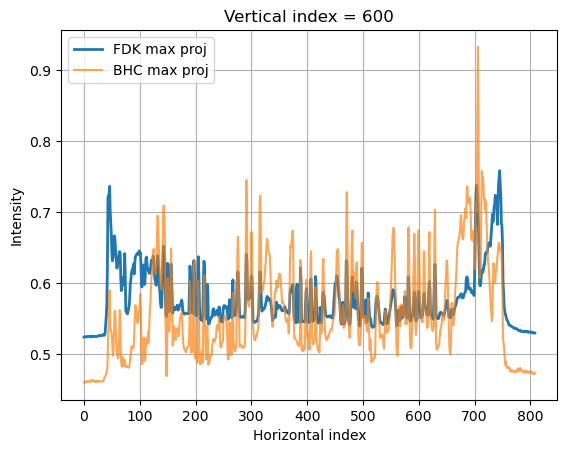

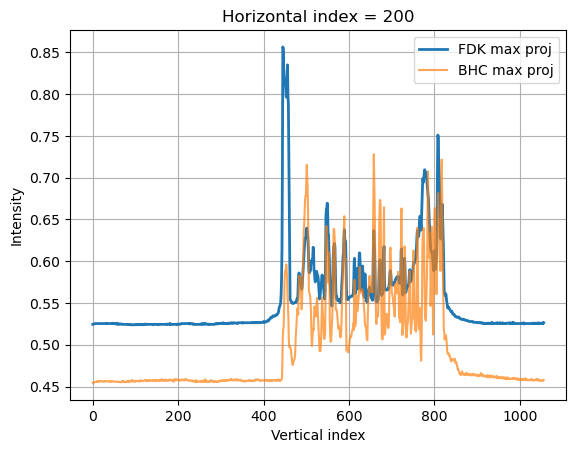

In [40]:
vert_idx = 600
kwargs = {'linewidth': 2, 'alpha': 0.7}
plt.plot(maxF[vert_idx,:], label='FDK max proj', linewidth=2)
plt.plot(maxB[vert_idx,:], label='BHC max proj', alpha=0.7)
plt.title(f"Vertical index = {vert_idx}")
plt.xlabel('Horizontal index')
plt.ylabel('Intensity')
plt.grid(True)
plt.legend()
plt.show()

hori_idx = 200
kwargs = {'linewidth': 2, 'alpha': 0.7}
plt.plot(maxF[:,hori_idx], label='FDK max proj', linewidth=2)
plt.plot(maxB[:,hori_idx], label='BHC max proj', alpha=0.7)
plt.title(f"Horizontal index = {hori_idx}")
plt.xlabel('Vertical index')
plt.ylabel('Intensity')
plt.grid(True)
plt.legend()
plt.show()

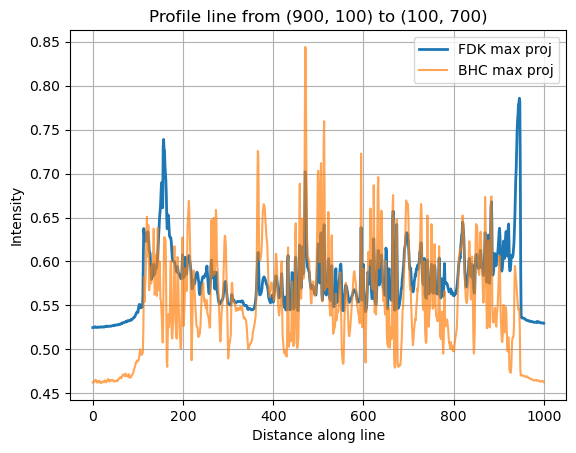

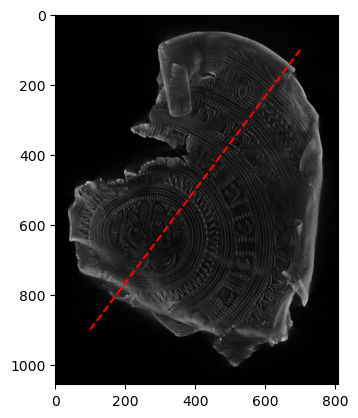

In [41]:
from skimage.measure import profile_line
start = (900,100)
end = (100,700)
pF = profile_line(maxF.astype(np.float32), start, end)
pB = profile_line(maxB.astype(np.float32), start, end)
plt.plot(pF, label='FDK max proj', linewidth=2)
plt.plot(pB, label='BHC max proj', alpha=0.7)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.title(f'Profile line from {start} to {end}')
plt.grid(True)
plt.legend()
plt.show()

plt.imshow(maxF, cmap='gray')
plt.plot([start[1], end[1]], [start[0], end[0]], 'r--', label='Profile Line')
plt.show()

In [42]:
volB.shape

(1057, 809, 261)

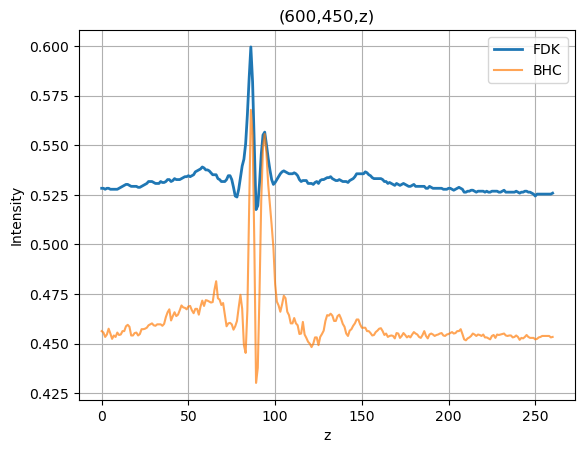

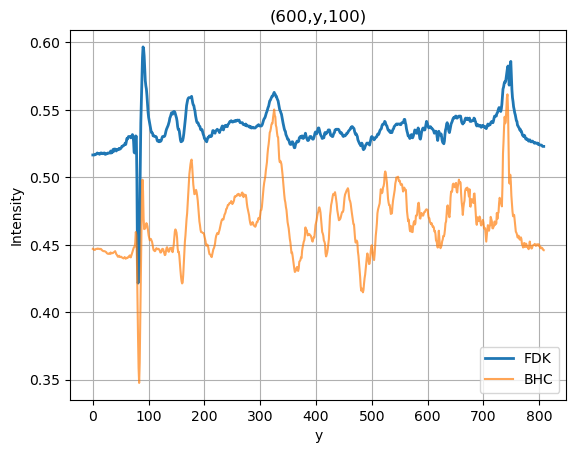

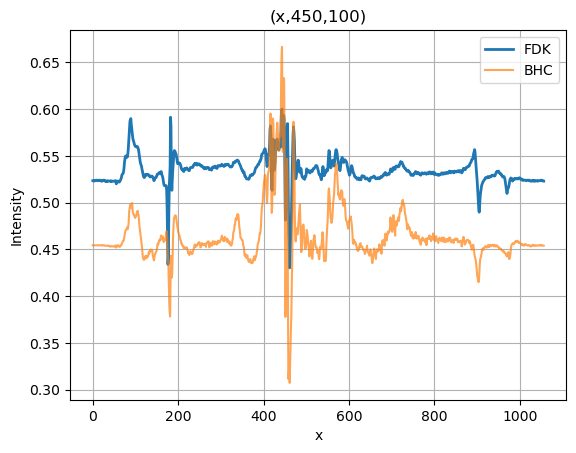

In [43]:
x_idx,y_idx = 600,450
plt.plot(volF[x_idx,y_idx,:], label='FDK', linewidth=2)
plt.plot(volB[x_idx,y_idx,:], label='BHC', alpha=0.7)
plt.title(f"({x_idx},{y_idx},z)")
plt.xlabel('z')
plt.ylabel('Intensity')
plt.grid(True)
plt.legend()
plt.show()

x_idx, z_idx = 600,100
plt.plot(volF[x_idx, :, z_idx], label='FDK', linewidth=2)
plt.plot(volB[x_idx, :, z_idx], label='BHC', alpha=0.7)
plt.title(f"({x_idx},y,{z_idx})")
plt.xlabel('y')
plt.ylabel('Intensity')
plt.grid(True)
plt.legend()
plt.show()


y_idx, z_idx = 450,100
plt.plot(volF[:, y_idx, z_idx], label='FDK', linewidth=2)
plt.plot(volB[:, y_idx, z_idx], label='BHC', alpha=0.7)
plt.title(f"(x,{y_idx},{z_idx})")
plt.xlabel('x')
plt.ylabel('Intensity')
plt.grid(True)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Diff Mean projection (z)')

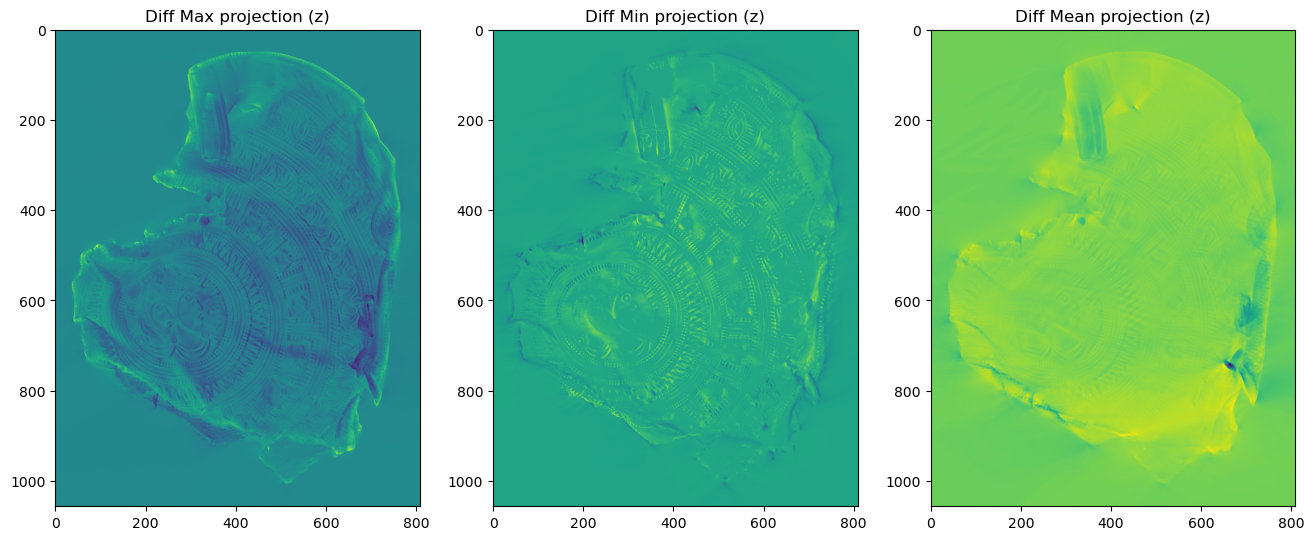

In [44]:
# Difference in Projections

fig, ax = plt.subplots(1,3, figsize=(16, 8))
ax[0].imshow(np.max(volF,axis=2) - np.max(volB,axis=2))
ax[0].set_title('Diff Max projection (z)')
ax[1].imshow(np.min(volF,axis=2) - np.min(volB,axis=2))
ax[1].set_title('Diff Min projection (z)')
ax[2].imshow(np.mean(volF,axis=2) - np.mean(volB,axis=2))
ax[2].set_title('Diff Mean projection (z)')


Text(0.5, 1.0, 'Min projections (z)')

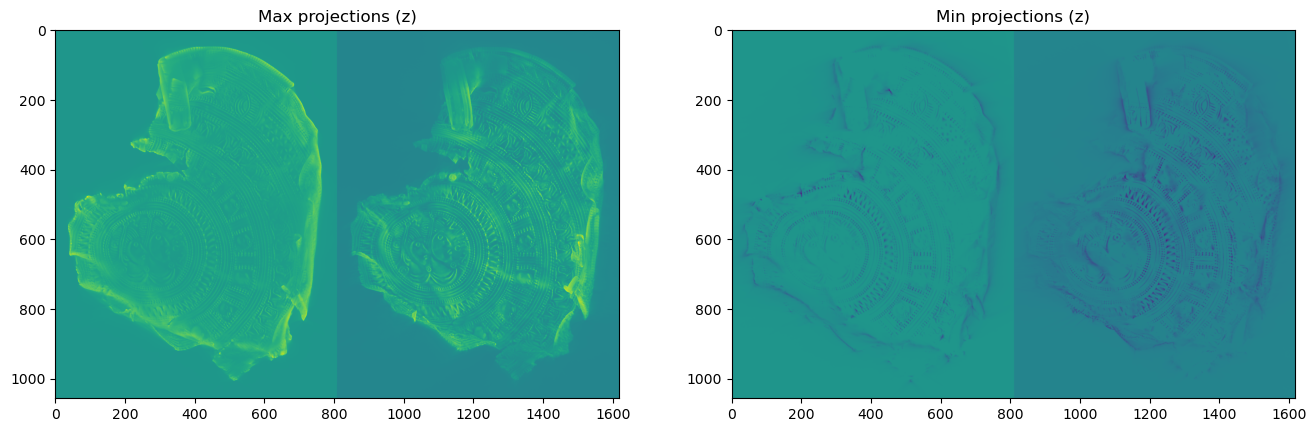

In [45]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
ax[0].imshow(np.concatenate((np.max(volF,axis=2), np.max(volB,axis=2)), axis=1), vmin=0, vmax=1)
ax[0].set_title('Max projections (z)')
ax[1].imshow(np.concatenate((np.min(volF,axis=2), np.min(volB,axis=2)), axis=1), vmin=0, vmax=1)
ax[1].set_title('Min projections (z)')


In [51]:
from cil.utilities.jupyter import islicer
islicer(volF,direction=0,size=(10,10))

In [70]:
def display_slices4(volume, axis=0, slices=None, rows=1, cols=None, slice_range=(None, None), fig_scale=1.0, include_endpoints=False, magnify=1.0, show=True):
    num_slices = volume.shape[axis]

    # Extract start and end from slice_range
    slice_start, slice_end = slice_range
    if slice_start is None:
        slice_start = 0
    if slice_end is None:
        slice_end = num_slices - 1

    if slices is None:
        slices = np.linspace(slice_start, slice_end, 5, dtype=int)
    if isinstance(slices, int):
        if include_endpoints:
            slices = np.linspace(slice_start, slice_end, slices, dtype=int)
        else:
            # Adjust the range to skip the very first and last points
            step = (slice_end - slice_start) / (slices + 1)
            new_start = slice_start + step
            new_end = slice_end - step
            slices = np.linspace(new_start, new_end, slices, dtype=int)

    total_slices = len(slices)

    if cols is None:
        # Calculate columns based on the number of rows and total slices
        cols = (total_slices + rows - 1) // rows  # Ceiling division

    # Adjust figure size based on the fig_scale parameter
    row_dim, col_dim = [volume.shape[i] for i in range(len(volume.shape)) if i != axis]
    row_prop, col_prop = row_dim/(row_dim+col_dim), col_dim/(row_dim+col_dim)
    fig, axs = plt.subplots(rows, cols, figsize=(col_prop * cols * 3 * fig_scale, row_prop * rows * 3 * fig_scale), squeeze=False)

    for i, slice_num in enumerate(slices):
        if magnify > 1.0:
            other_axes = [x for x in range(3) if x != axis]
            center = np.array(np.array(volume.shape)[other_axes]) // 2
            length = np.array(np.array(volume.shape)[other_axes]) // magnify
            min_idx = np.round(center - length // 2).astype(int)
            max_idx = np.round(center + length // 2).astype(int)

            if axis == 0:
                slice_data = volume[slice_num, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
            elif axis == 1:
                slice_data = volume[min_idx[0]:max_idx[0], slice_num, min_idx[1]:max_idx[1]]
            else:
                slice_data = volume[min_idx[0]:max_idx[0], min_idx[1]:max_idx[1], slice_num]
        else:
            if axis == 0:
                slice_data = volume[slice_num, :, :]
            elif axis == 1:
                slice_data = volume[:, slice_num, :]
            else:
                slice_data = volume[:, :, slice_num]

        ax = axs[i // cols, i % cols]
        ax.imshow(slice_data, cmap='gray')
        ax.axis('off')
        # Set subtitle in the upper left corner with a background
        # fontsize 12
        ax.text(0.05, 0.95, f'Slice {slice_num}', color='white', ha='left', va='top', fontsize=7 * fig_scale * 0.5, 
                transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Hide any extra axes if there are more subplots than slices
    for j in range(i + 1, rows * cols):
        axs[j // cols, j % cols].axis('off')

    pad_size = 0.5
    plt.tight_layout(pad=0, h_pad= pad_size*fig_scale, w_pad=pad_size*fig_scale)
    if show: plt.show()

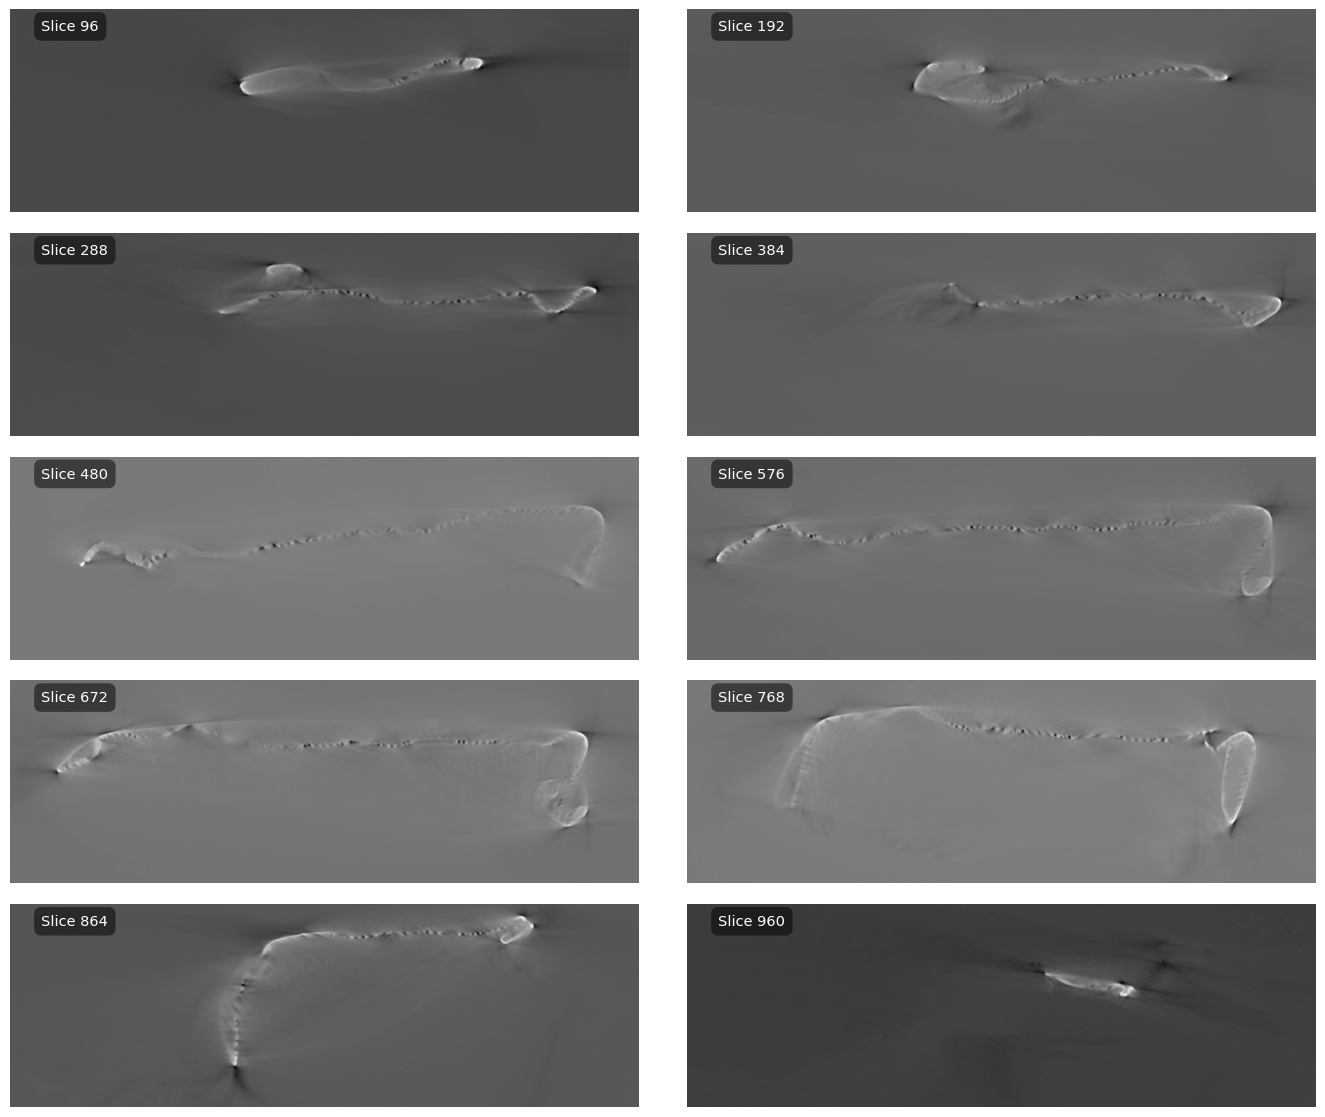

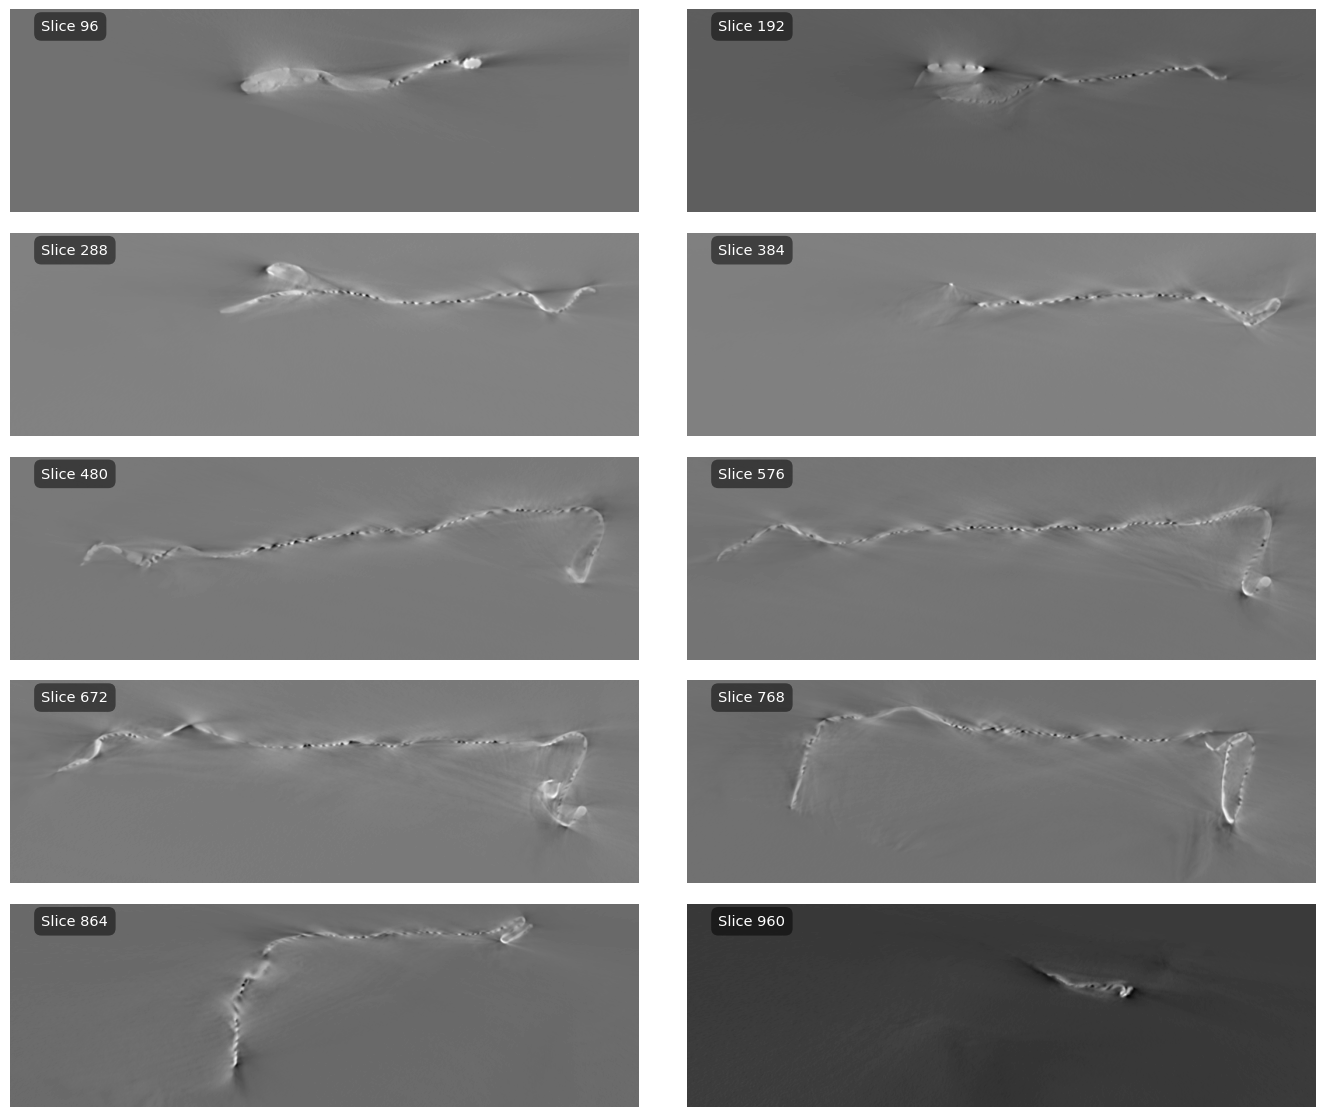

In [87]:
kwargs = {'axis': 2, 'slices': 10, 'rows': 5, 'fig_scale': 3.0}
display_slices4(volF.T, **kwargs)
display_slices4(volB.T, **kwargs)

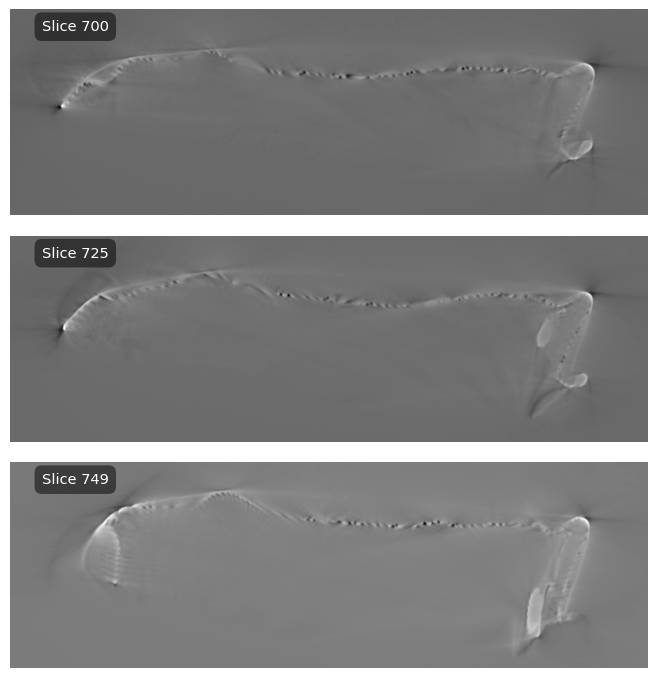

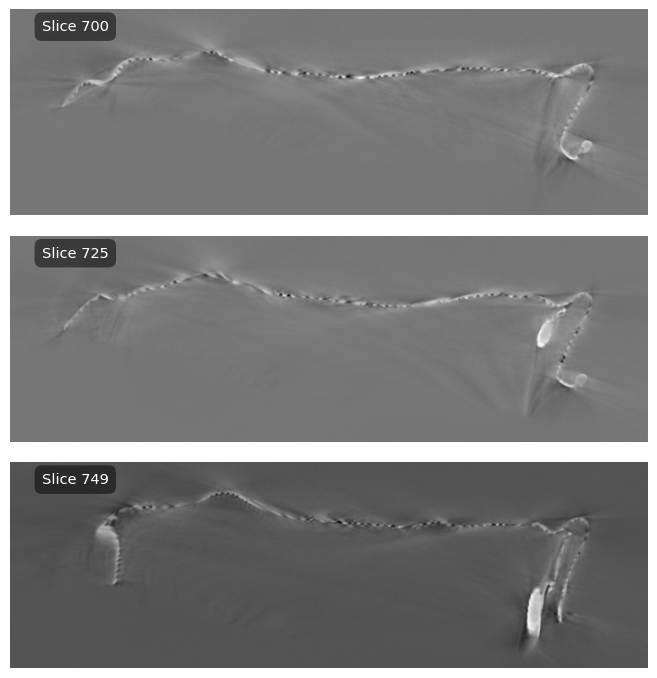

In [94]:
kwargs = {'axis': 2, 'slices': [700,725,749], 'rows': 3, 'fig_scale': 3.0}
display_slices4(volF.T, **kwargs)
display_slices4(volB.T, **kwargs)

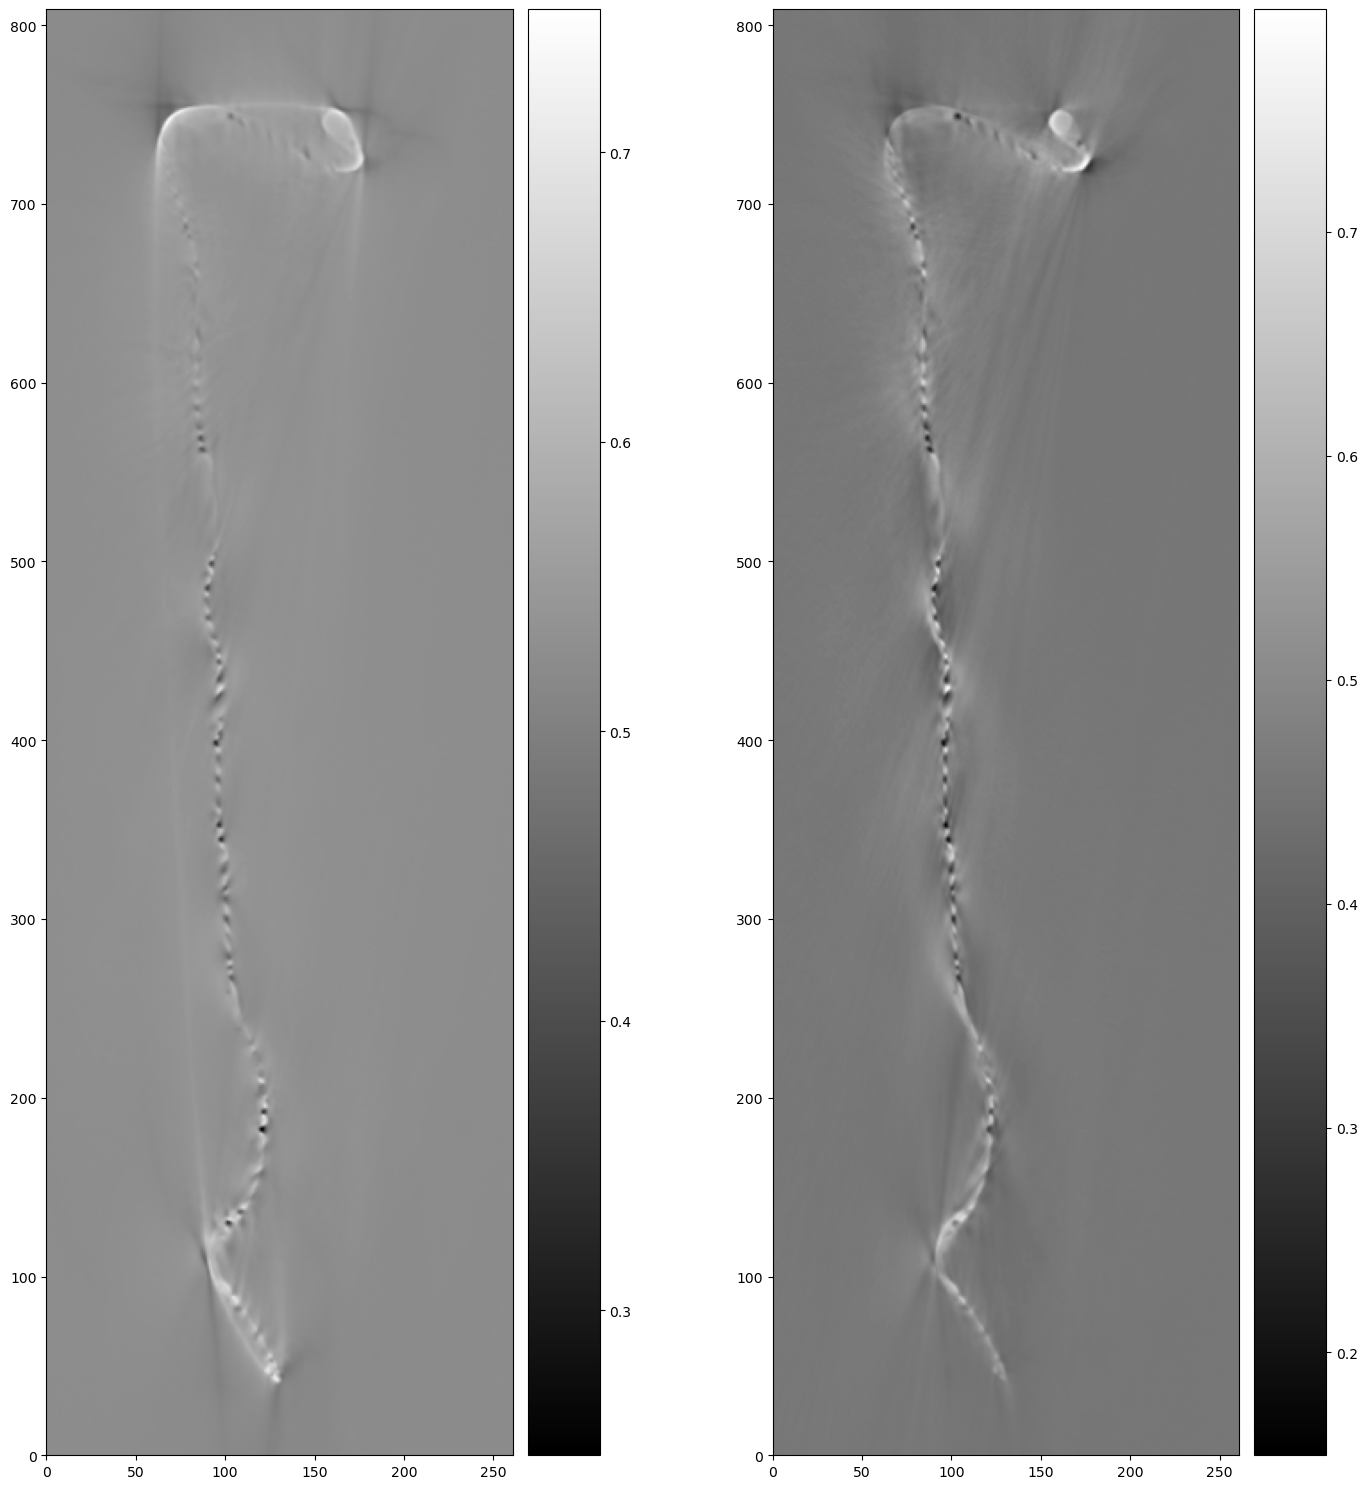

In [112]:
from cil.utilities.display import show2D
axis,i = 0,554
slice_tuple = tuple(i if _ == axis else slice(None) for _ in range(3))
show2D([volF[slice_tuple],volB[slice_tuple]])

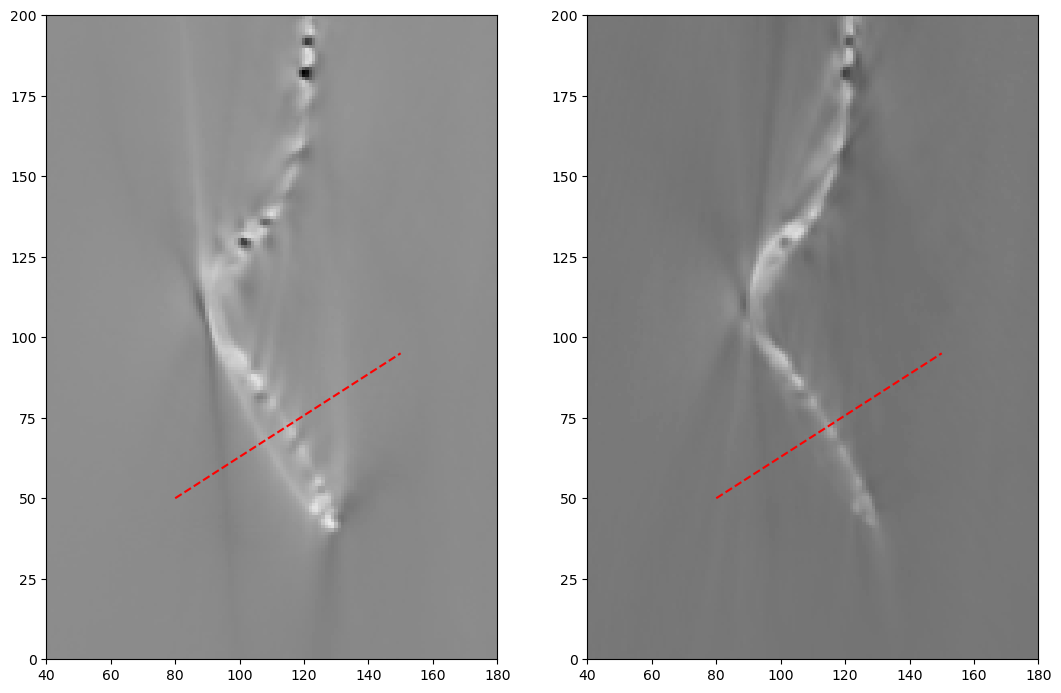

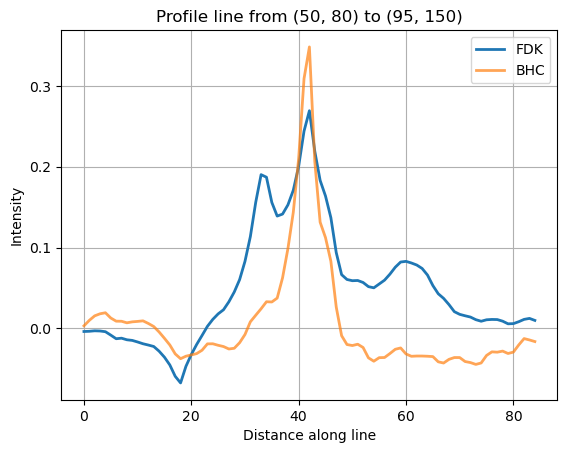

In [58]:

axis,i = 0,554
start = (50,80)
end = (95,150)

# start = (80,80)
# end = (95,150)

# start = (70,70)
# end = (70,150)

slice_tuple = tuple(i if _ == axis else slice(None) for _ in range(3))

sliceF = volQ[slice_tuple]
sliceB = volBHC[slice_tuple]

#############
xlim = (40,180)
ylim = (0,200)
fig, ax = plt.subplots(1,2)
plt.sca(ax[0])
plt.imshow(sliceF, cmap='gray')
plt.plot([start[1], end[1]], [start[0], end[0]], 'r--', label='Profile Line')
plt.xlim(*xlim)
plt.ylim(*ylim)

plt.sca(ax[1])
plt.imshow(sliceB, cmap='gray')
plt.plot([start[1], end[1]], [start[0], end[0]], 'r--', label='Profile Line')
plt.xlim(*xlim)
plt.ylim(*ylim)

fig = plt.gcf()
current_size = fig.get_size_inches()
new_size = current_size * 2
fig.set_size_inches(new_size, forward=True)

plt.show()

##############
from skimage.measure import profile_line
pF = profile_line(sliceF.astype(np.float32), start, end)
pB = profile_line(sliceB.astype(np.float32), start, end)
plt.plot(pF, label='FDK', linewidth=2)
plt.plot(pB, label='BHC', linewidth=2, alpha=0.7)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.title(f'Profile line from {start} to {end}')
plt.grid(True)
plt.legend()
plt.show()

In [114]:
5*2.333

11.665000000000001

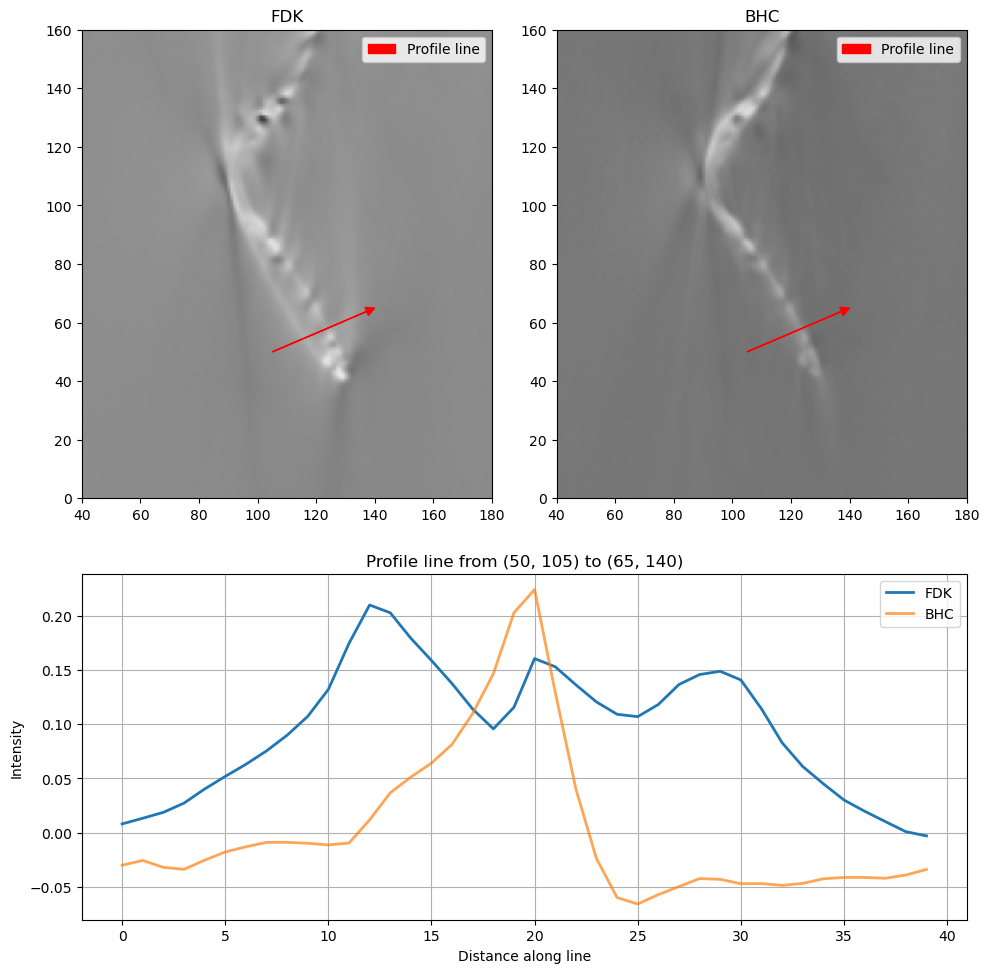

In [171]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

axis = 0
i = 554
# start, end = (50, 80), (95, 150)
# start, end = (50, 85), (80-5, 150)
# start, end = (50, 80), (80-10, 150)
start, end = (40, 80), (70, 150)
# print((end[1]-start[1])/(end[0]-start[0]))
# start, end = (45, 90), (70, 150)
start, end = (50, 105), (65, 140)

slice_tuple = tuple(i if _ == axis else slice(None) for _ in range(3))

sliceF = volQ[slice_tuple]
sliceB = volBHC[slice_tuple]

xlim = (40, 180)
ylim = (0, 160)

fig = plt.figure(figsize=(10, 10))  # Adjust figsize if necessary
# fig = plt.figure()

# Create a gridspec with 2 rows, 2 columns
gs = fig.add_gridspec(2, 2, height_ratios=[1.5,1])

# First subplot (top left)
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(sliceF, cmap='gray')
# ax0.plot([start[1], end[1]], [start[0], end[0]], 'r--', label='Profile Line', linewidth=1.5)
ax0.arrow(start[1], start[0], (end[1] - start[1]), (end[0] - start[0]), head_width=3, head_length=3,
          fc='r', ec='r', length_includes_head=True, label='Profile line')
ax0.set_xlim(*xlim)
ax0.set_ylim(*ylim)
ax0.set_title("FDK")
ax0.legend()

# Second subplot (top right)
ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(sliceB, cmap='gray')
ax1.arrow(start[1], start[0], (end[1] - start[1]), (end[0] - start[0]), head_width=3, head_length=3,
          fc='r', ec='r', length_includes_head=True, label='Profile line')
# ax1.plot([start[1], end[1]], [start[0], end[0]], 'k.', label='Profile Line', linewidth=1.5)

ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)
ax1.set_title("BHC")
ax1.legend()

# Third subplot (bottom, spans both columns)
ax2 = fig.add_subplot(gs[1, :])
pF = profile_line(sliceF.astype(np.float32), start, end)
pB = profile_line(sliceB.astype(np.float32), start, end)
ax2.plot(pF, label='FDK', linewidth=2)
ax2.plot(pB, label='BHC', linewidth=2, alpha=0.7)
ax2.set_ylabel('Intensity')
ax2.set_xlabel('Distance along line')
ax2.set_title(f'Profile line from {start} to {end}')
ax2.grid(True)
ax2.legend()

# Adjust layout to minimize whitespace
plt.tight_layout()
# plt.savefig('plots/X20_segm_comparison1.pdf')
plt.show()
